# **JuliaPanel**

In [1]:
include("./aeroModules.jl")
using .panelSolver
using BenchmarkTools
using PyPlot
using PyCall
jtplot = pyimport("jupyterthemes.jtplot")
jtplot.style(grid=false)
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16
rcParams["font.family"] = "serif"
rcParams["text.usetex"] = true

true

## Fundamental Solutions

In [2]:
x_domain, y_domain = (-2, 2), (-1, 1)
source_strength = 1.0
sink_strength = -1.5
kappa = 1.0
x_source, y_source = 0.0, 0.0
x_sink, y_sink = 1.0, 0.0
uniform_mag = 1.0
uniform_ang = 0.0
grid_size = 50
x_dom, y_dom = range(x_domain[1], length=grid_size, stop=x_domain[2]), range(y_domain[1], length=grid_size, stop=y_domain[2])
X = repeat(x_dom', grid_size)
Y = repeat(y_dom, 1, grid_size)
R = sqrt(kappa/(2π*uniform_mag));

In [3]:
sourcerer = panelSolver.Source2D(source_strength, x_source, y_source)
uniformer = panelSolver.Uniform2D(uniform_mag, uniform_ang)
doublet = panelSolver.Doublet2D(kappa, x_source, y_source)

# vels = [ a .+ b for (a, b) in zip(uniformer.velocity.(X, Y), doublet.velocity.(X, Y)) ]
# pots = uniformer.potential.(X, Y) .+ doublet.potential.(X, Y);
streams = uniformer.stream.(X, Y) .+ doublet.stream.(X, Y);
vels, pots = panelSolver.gridData([uniformer, doublet], zip(X,Y))
cp = panelSolver.pressureCoefficient2D(vels, uniformer.magnitude);

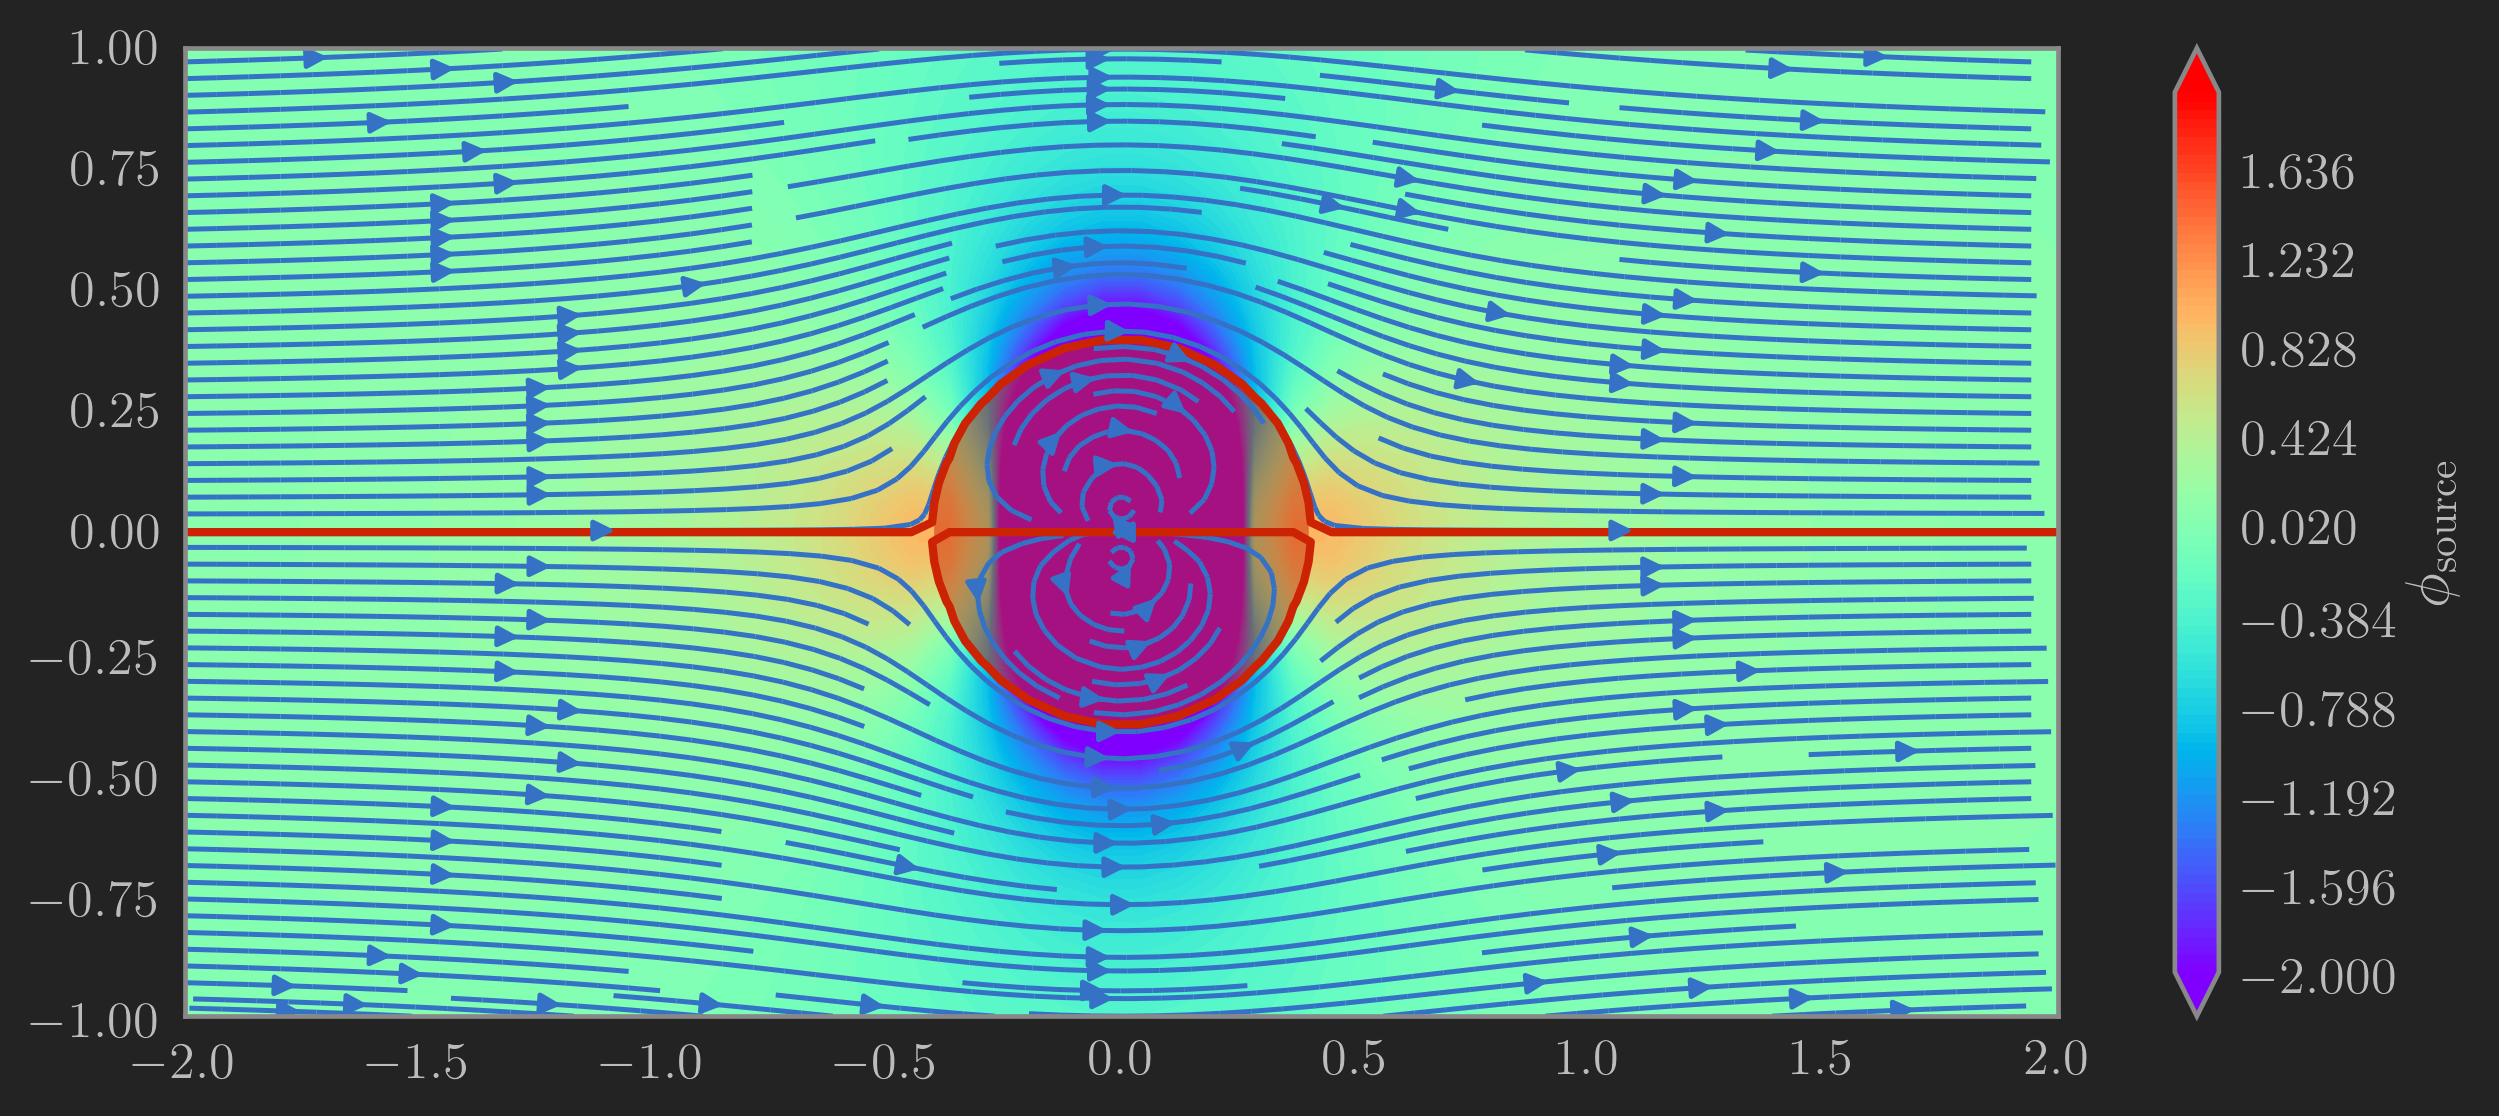

In [4]:
width = 8.0
height = (y_domain[2] - y_domain[1]) / (x_domain[2] - x_domain[1]) * width
fig1 = figure(1, figsize=(1.1width, height), dpi=300)
streamplot(X, Y, [ u for (u, v) in vels ], [ v for (u,v) in vels ], density=2)
contourf(X, Y, cp, levels=range(x_domain[1], stop=x_domain[end], length=100), extend="both", cmap=PyPlot.cm.rainbow)
colorbar(label="\$\\phi_{\\mathrm{source}}\$")
contour(X, Y, streams, levels=[0.], colors="#CD2305", linewidths=2, linestyles="solid")
circle = plt.Circle((0, 0), radius=R, color="#CD2305", alpha=0.5)
gca().add_patch(circle)
xlim(x_domain)
ylim(y_domain)
tight_layout();

## Panel Methods

#### Source Panels

In [331]:
include("./aeroModules.jl")
using .panelSolver
using BenchmarkTools
using PyPlot
using PyCall
jtplot = pyimport("jupyterthemes.jtplot")
jtplot.style(grid=false)
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16
rcParams["font.family"] = "serif"
rcParams["text.usetex"] = true

true

In [139]:
x_domain, y_domain = (-3, 3), (-2, 2)
grid_size = 50
x_dom, y_dom = range(x_domain[1], stop=x_domain[2], length=grid_size), range(y_domain[1], stop=y_domain[2], length=grid_size)
X = repeat(x_dom', grid_size)
Y = repeat(y_dom, 1, grid_size);

r = 1
N_panels = 50
theta = range(0.0, stop=2π, length=N_panels + 1)
x_center, y_center = 0.0, 0.0
x_cylinder, y_cylinder = (x_center .+ r*cos.(theta), y_center .+ r*sin.(theta))
x_ends = r*cos.(theta)
y_ends = r*sin.(theta)
uniform_mag = 1.0
uniform_ang = 0.0

uniform = panelSolver.Uniform2D(uniform_mag, uniform_ang)
source_panels = [ panelSolver.SourcePanel2D(x_ends[i], y_ends[i], x_ends[i+1], y_ends[i+1]) for i in 1:N_panels ];
cylinder = panelSolver.SourcePanelSolver2D(source_panels, uniform);

In [140]:
@time strengths, vts, error = panelSolver.sourcePanelSolver2D(cylinder, uniform);
vels, pots = panelSolver.gridData(cylinder, zip(X,Y))
cp = panelSolver.pressureCoefficient2D(vels, uniform.magnitude);

UndefVarError: UndefVarError: sourcePanelSolver2D not defined

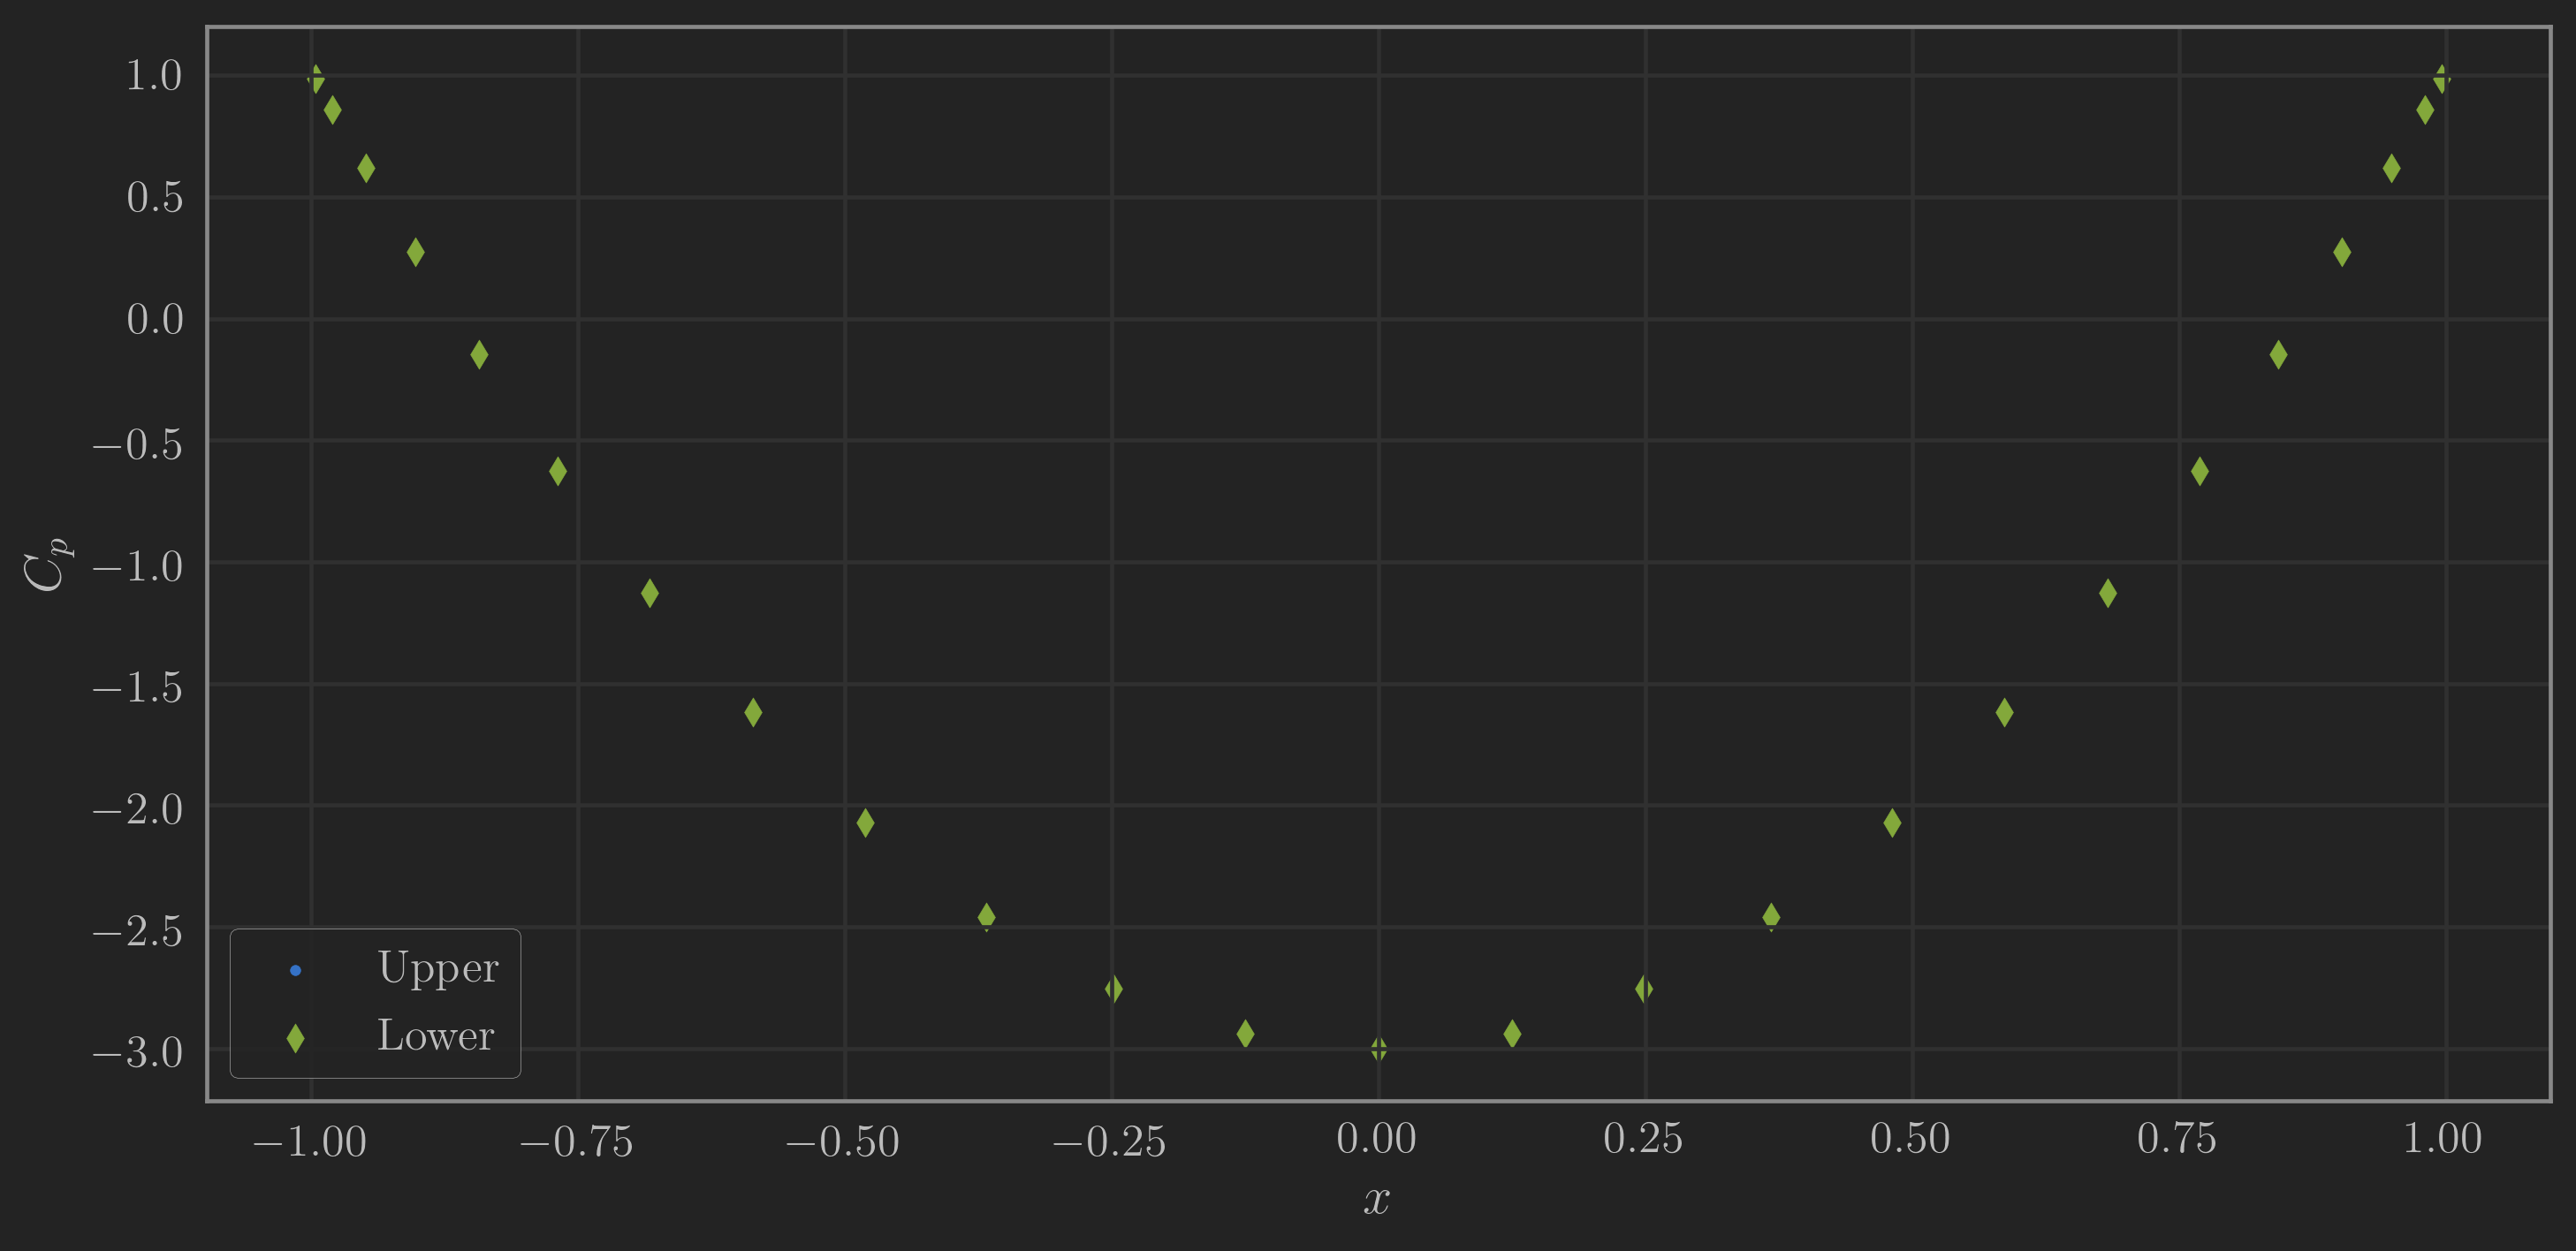

In [27]:
fig20 = figure(2, figsize=(10, 5), dpi=300)
grid()
xlabel("\$x\$")
ylabel("\$C_p\$")
# plot(x_cylinder, cp_anal, label="Analytical")
scatter([p.xc for p in source_panels if p.loc == "upper"], [p.cp for p in source_panels if p.loc == "upper" ], marker=".", label="Upper")
scatter([p.xc for p in source_panels if p.loc == "lower"], [p.cp for p in source_panels if p.loc == "lower" ], marker="d", label="Lower")
tight_layout()
legend();

In [4]:
width = 8.0
height = (y_domain[2] - y_domain[1]) / (x_domain[2] - x_domain[1]) * width
fig1 = figure(1, figsize=(1.15width, height), dpi=300)
streamplot(X, Y, [ u for (u,v) in vels ], [ v for (u,v) in vels ], density=2)
scatter([p.xs for p in source_panels], [p.ys for p in source_panels], marker=".", label="Endpoints", color="orange", zorder=3)
scatter([p.xc for p in source_panels], [p.yc for p in source_panels], marker=".", label="Center-points", color="black", zorder=3)
contourf(X, Y, cp, 50, cmap=PyPlot.cm.rainbow)
# colorbar(label="\$\\phi_{\\mathrm{panel}}\$")
colorbar(label="\$C_p\$")
plt.plot(x_cylinder, y_cylinder, label="Cylinder", color="b", linestyle="--", linewidth=1)
plot(x_ends, y_ends, label="Panels", color="orange", linestyle="-", linewidth=2)
scatter([p.xs for p in source_panels], [p.ys for p in source_panels], label="Endpoints", color="orange", s=40)
scatter([p.xc for p in source_panels], [p.yc for p in source_panels], label="Center-points", color="w", s=40, zorder=3)
fill(x_ends, y_ends, color="k", zorder=3)
title("Number of Source Panels: {$N_panels}")
tight_layout();

UndefVarError: UndefVarError: vels not defined

#### Vortex-Source Panels

In [35]:
include("./aeroModules.jl")
using .panelSolver
using BenchmarkTools
using PyPlot
using PyCall
jtplot = pyimport("jupyterthemes.jtplot")
jtplot.style(grid=false)
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16
rcParams["font.family"] = "serif"
rcParams["text.usetex"] = true

true

In [38]:
coords = open("resources/naca0012.dat") do f 
    [ Tuple(parse.(Float64,(split(line)))) for line in eachline(f) ] 
end

x_domain, y_domain = (-1, 2), (-1, 1)
grid_size = 50
x_dom, y_dom = range(x_domain[1], length=grid_size, stop=x_domain[2]), range(y_domain[1], length=grid_size, stop=y_domain[2])
X = repeat(x_dom', grid_size)
Y = repeat(y_dom, 1, grid_size);

r = 1
N_panels = 10
theta = range(0.0, stop=2π, length=N_panels + 1)
x_center, y_center = 0.0, 0.0
x_cylinder, y_cylinder = (x_center .+ r*cos.(theta), y_center .+ r*sin.(theta))
x_ends = r*cos.(theta)
y_ends = r*sin.(theta)
uniform_mag, uniform_ang = 1.0, 5.0
panels = panelSolver.cosinePanels([ x for (x, y) in coords ], [ y for (x, y) in coords ], N_panels)
# xs = range(0.0, stop=1.0, length=6)
# coords = zip(xs, zeros(length(xs)))
# coords = [(0.0, 0.0), (0.25,0.12), (0.33, 0.10), (0.5, 0.08), (0.75, 0.05), (1.0, 0.0)]
# panels = zip(xs[1:end-1], xs[2:end]);
# parabol(x, eps, c) = 4*0.1*x*(1 - x)
# divs = range(0., stop=1.0, length = N_panels + 1)
# ys = parabol.(divs)
# coords = zip(divs, ys)
# panels = zip(divs[1:end-1], ys[1:end-1], divs[2:end], ys[2:end])
# source_panels = [ panelSolver.VortexPanel2D(x1, 0., x2, 0) for (x1, x2) in panels ]
# source_panels = [ panelSolver.DoubletPanel2D(x1,y1,x2,y2) for (x1,y1,x2,y2) in panels ]
source_panels = [ panelSolver.DoubletSourcePanel2D(panel.xs, panel.ys, panel.xe, panel.ye) for panel in panels ];
uniform = panelSolver.Uniform2D(uniform_mag, uniform_ang);
airfoil = panelSolver.DoubletSourcePanelSolver2D(source_panels, uniform);

1.00.01000.00.0

In [39]:
@time strengths, vts, cl, error = panelSolver.panelSolver2D(airfoil, uniform);
# vels, pots = panelSolver.gridData(clarky, zip(X,Y));
# cp = panelSolver.pressureCoefficient2D(vels, uniform.magnitude);
print(strengths, "\n")
print("Lift Coefficient: ", cl, "\n")
print("Error: ", error)
filter(x -> (x < 0 || x > 1), [ panel.xc for panel in panels ])

[0.5 -0.002563913969583502 -0.0016837304388347702 -0.0017255029281597223 -0.0021551738076072136 -0.0030101714102723936 -0.004710337748815997 -0.009095202248808679 -0.03113402871830838 -0.41138250771501084; -0.004954018748032687 0.5 -0.00465903485161249 -0.004680202183443357 -0.006384259055893642 -0.00985277296968978 -0.018374190374163827 -0.059802137722178024 -0.3695557167799162 -0.040215353158621445; -0.004307531390873657 -0.005353111532343684 0.5 -0.012963014364372083 -0.014748064306133117 -0.02635854531809927 -0.08270042539256436 -0.31681720341269815 -0.04813955908606483 -0.007991372309877695; -0.006510461657319465 -0.007436798915774269 -0.011248854787032692 0.5 -0.0520732082053681 -0.11067137032530072 -0.27694882885108263 -0.061149953942707114 -0.014454188051779579 -0.007547945046575505; -0.008419535566926201 -0.009929690710883971 -0.014288979244239447 -0.028813280470723224 0.5 -0.27474643460163584 -0.06908421768667498 -0.02125490335188865 -0.011432992235345477 -0.0086712744067626;

0-element Array{Float64,1}

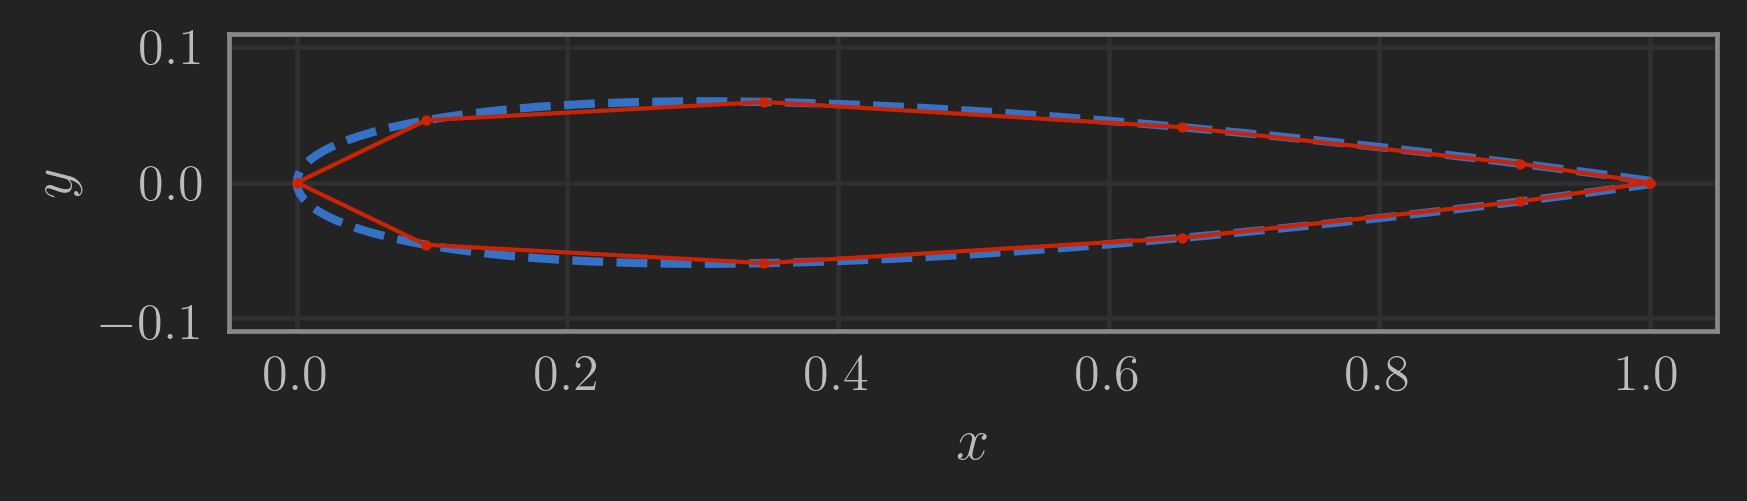

In [33]:
figure(1, dpi=300)
xlabel("\$x\$")
ylabel("\$y\$")
plot([ x for (x,y) in coords], [ y for (x,y) in coords ], linestyle="--", linewidth=2)
plot(push!([panel.xs for panel in source_panels], source_panels[1].xs), push!([panel.ys for panel in source_panels], source_panels[1].ys), linestyle="-", linewidth=1, marker=".", markersize=5, color="#CD2305")
axis("scaled", adjustable="box")
xlim(minimum([ x for (x,y) in coords]) - 0.05, maximum([ x for (x,y) in coords]) + 0.05)
ylim(minimum([ y for (x,y) in coords ]) - 0.05, maximum([ y for (x,y) in coords ]) + 0.05)
grid()

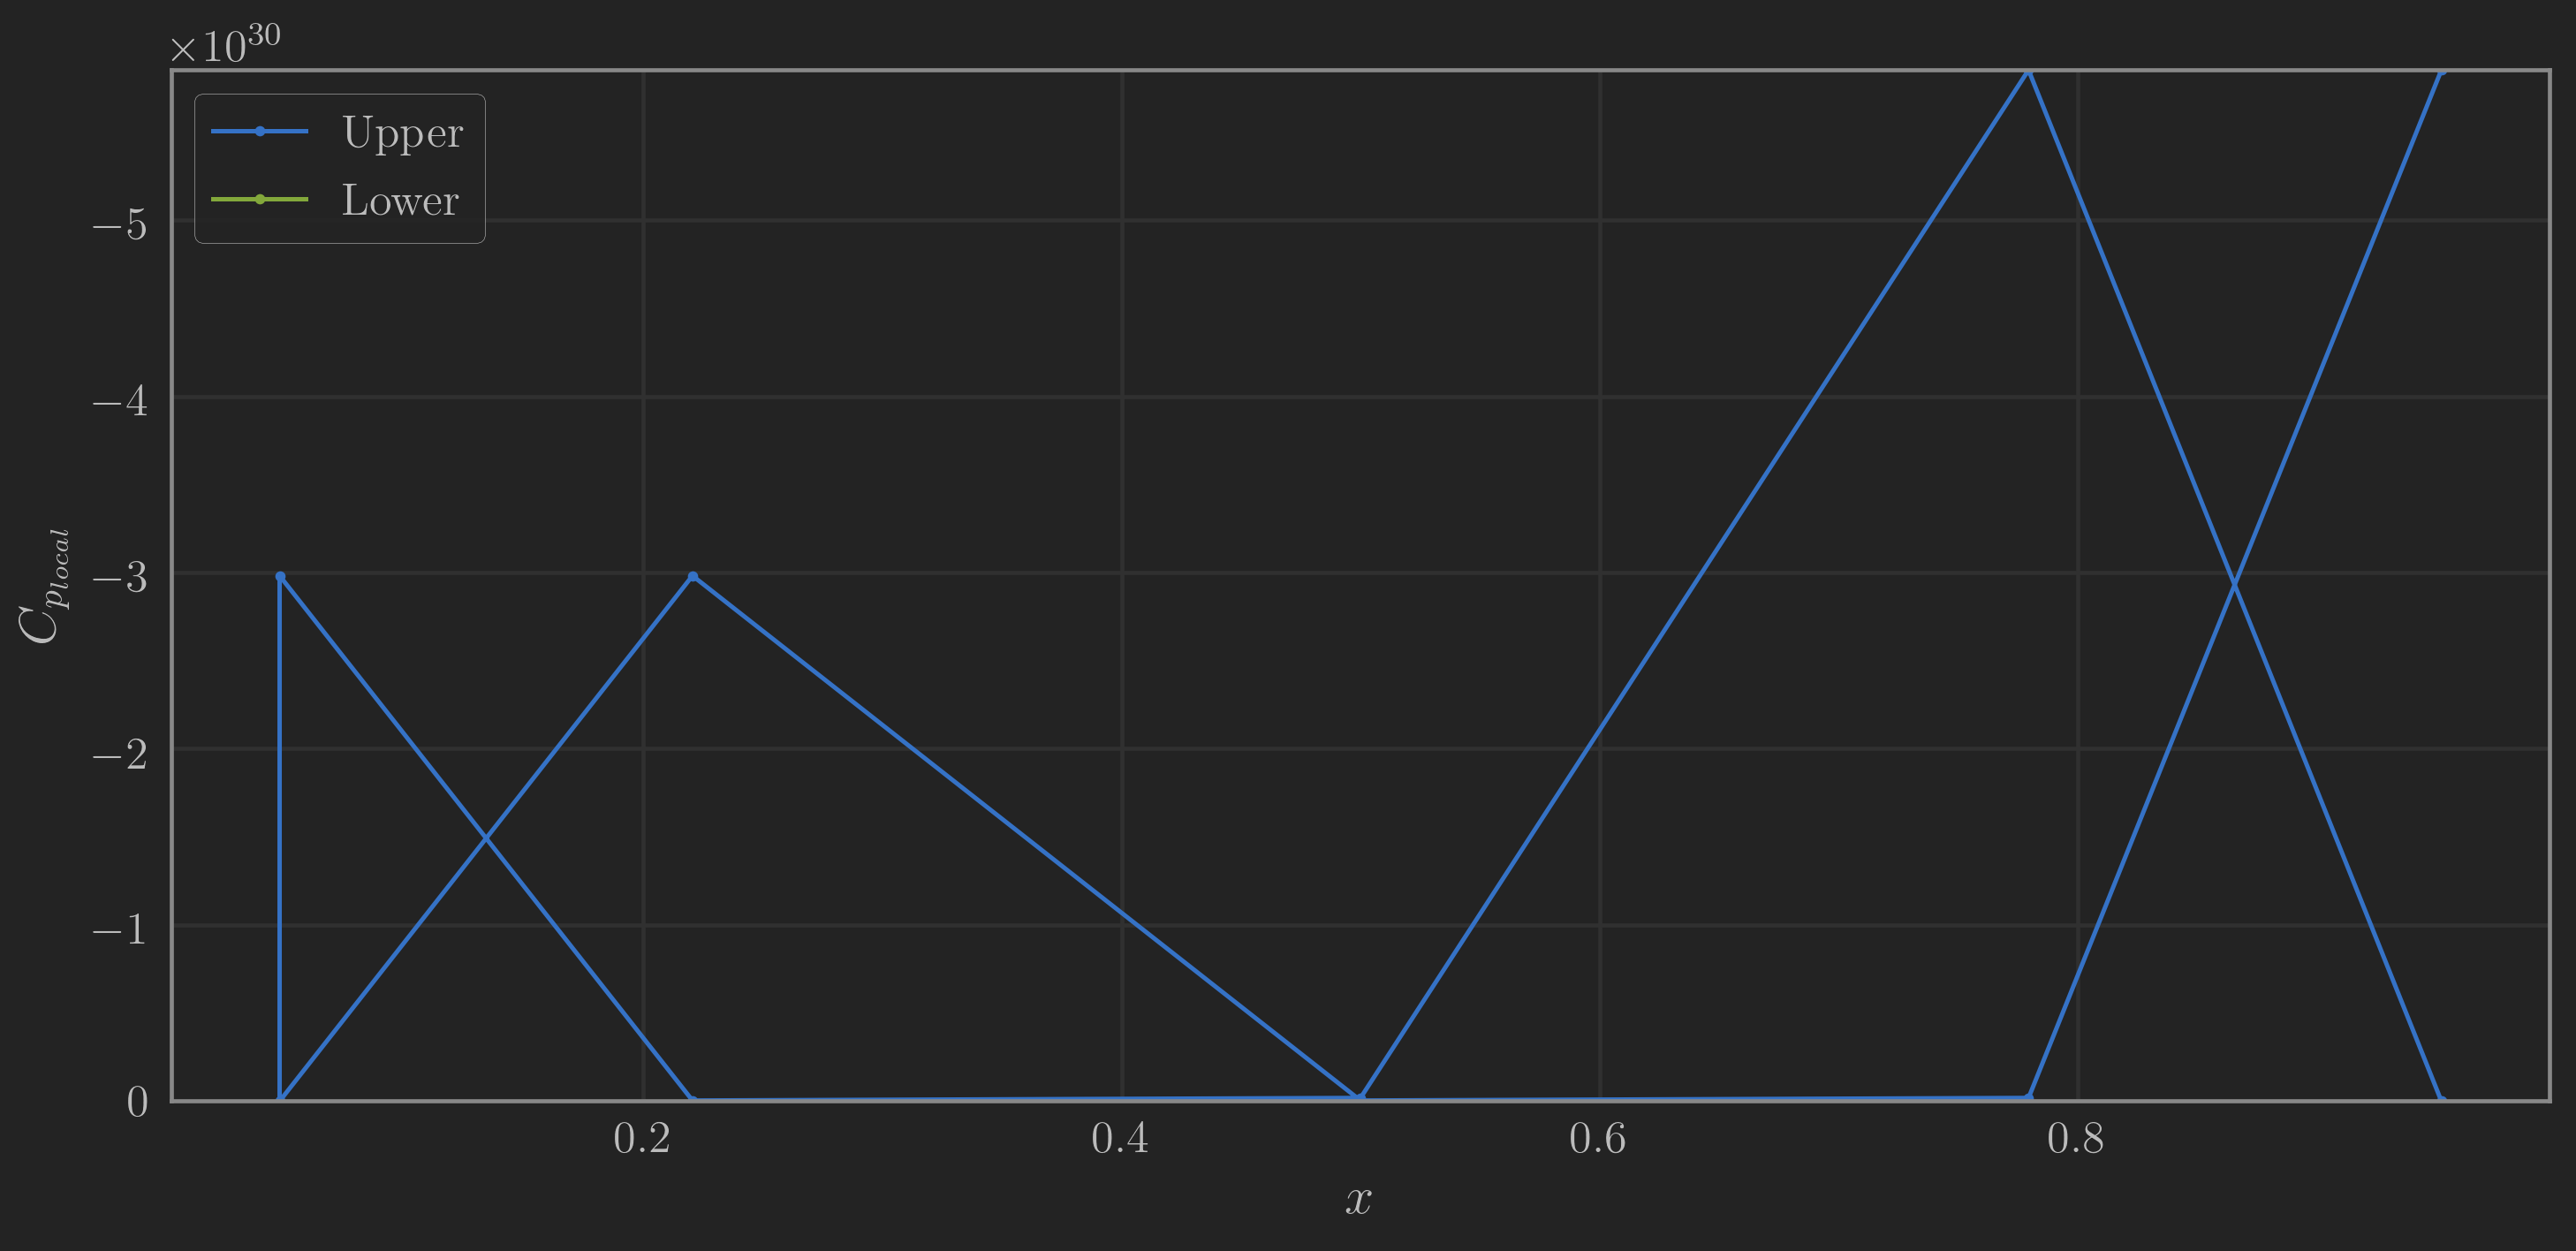

In [34]:
fig20 = figure(2, figsize=(10, 5), dpi=300)
grid()
xlabel("\$x\$")
ylabel("\$C_{p_{local}}\$")
plot([p.xc for p in source_panels if p.loc == "upper"], [p.cp for p in source_panels if p.loc == "upper" ], marker=".", label="Upper")
plot([p.xc for p in source_panels if p.loc == "lower"], [p.cp for p in source_panels if p.loc == "lower" ], marker=".", label="Lower")                                                     
ylim(maximum([p.cp for p in source_panels]) + 0.05, minimum([p.cp for p in source_panels]) - 0.05)
tight_layout()
legend();

In [409]:
width = 8.0
height = (y_domain[2] - y_domain[1]) / (x_domain[2] - x_domain[1]) * width
fig1 = figure(1, figsize=(1.1width, height), dpi=300)
streamplot(X, Y, [ u for (u,v) in vels ], [ v for (u,v) in vels ], density=4)
# scatter([p.xc for p in source_panels], [p.yc for p in source_panels], marker=".", label="Center-points", color="white", zorder=3)
contourf(X, Y, pots, 50, cmap=PyPlot.cm.rainbow)
# colorbar(label="\$\\phi_{\\mathrm{panel}}\$")
colorbar(label="\$C_p\$")
# fill([x for (x,y) in coords], [y for (x,y) in coords], color="k", zorder=3)
plot([p.xs for p in source_panels], [p.ys for p in source_panels], linestyle="--", linewidth=0.5, label="Endpoints", color="orange", zorder=3)
xlim(x_domain)
ylim(y_domain)
title("Number of Vortex-Source Panels: {$N_panels}")
tight_layout();

UndefVarError: UndefVarError: vels not defined

In [403]:
include("./aeroModules.jl")
using .panelSolver
using BenchmarkTools
using PyPlot
using PyCall
jtplot = pyimport("jupyterthemes.jtplot")
jtplot.style(grid=false)
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16
rcParams["font.family"] = "serif"
rcParams["text.usetex"] = true

true

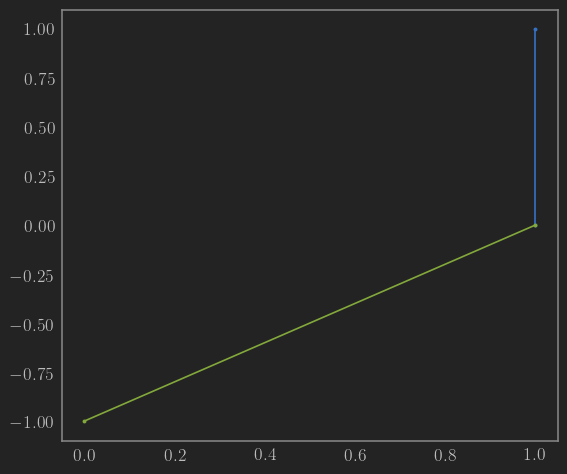

-90.0, -2.356194490192345
-0.7071067811865476, -0.7071067811865475

In [440]:
panel1 = panelSolver.DoubletSourcePanel2D(1.0, 1.0, 1.0, 0.0)
panel2 = panelSolver.DoubletSourcePanel2D(1.0, 0.0, 0.0, -1.0)
xn, yn = panelSolver.panelCoords(panel1.xs, panel1.ys, panel2.xs, panel2.ys, panel2.angle)
print(rad2deg(panel1.angle), ", ", panel2.angle, '\n')
print(xn, ", ", yn)
panel2.doubletInfluence(xn, yn)

plot([panel1.xs, panel1.xe], [panel1.ys, panel1.ye], ".-", label=["x1_s", "x1_e"])
plot([panel2.xs, panel2.xe], [panel2.ys, panel2.ye], ".-", label=["x2_s", "x2_e"])
show()